## TensorFlow Linear Regression Example Code
### Fire-theft case

In [0]:
import numpy as np
import pandas as pd
import tensorflow as tf

In [5]:
print(f"{tf.__version__}")

1.14.0


1. Read dataset FireTheft.xls

In [0]:
#Step 1. Read dataset
df = pd.read_excel('http://storm.cis.fordham.edu/~yli/data/FireTheft.xls')

*** No CODEPAGE record, no encoding_override: will use 'ascii'


In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 2 columns):
X    42 non-null float64
Y    42 non-null int64
dtypes: float64(1), int64(1)
memory usage: 752.0 bytes


In [0]:
df.head()

,X,Y
0,6.2,29
1,9.5,44
2,10.5,36
3,7.7,37
4,8.6,53


In [0]:
df.describe()

,X,Y
count,42.000000,42.000000
mean,12.692857,33.666667
std,9.667683,23.040438
min,2.000000,4.000000
25%,5.625000,22.000000
50%,10.500000,31.000000
75%,17.175000,39.750000
max,39.700000,147.000000


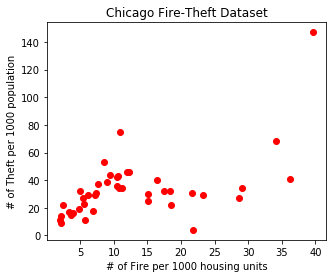

In [0]:
#visualize the dataset
import matplotlib.pyplot as plt
%matplotlib inline

fig,ax = plt.subplots(1,1,figsize=(5,4))
ax.scatter(df['X'], df['Y'],
        color='red') #draw a default line plot in this plot
#a dictionary for figure specification
props = {'title':'Chicago Fire-Theft Dataset',
         'xlabel':'# of Fire per 1000 housing units',
         'ylabel':'# of Theft per 1000 population'}
ax.set(**props)
       
#plt.legend(loc='best') #show legend defined
plt.show()

2. Define the linear regression model

In [0]:
def linear_regression(X, Y, initializer=None, seed=42, learning_rate=0.001):
    
    with tf.name_scope('linear_regression'):
        with tf.name_scope('model'):
            if initializer is None:
                initializer= tf.constant(0.0)
            W = tf.Variable(initializer, name='W')
            b = tf.Variable(initializer, name='b')
            Y_pred = W*X+b
            
        with tf.name_scope('train'):
            loss = tf.square(Y-Y_pred, name='loss')#min. square error
            optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate)
            training_op = optimizer.minimize(loss)
            
        
        with tf.name_scope('init'):
            init = tf.global_variables_initializer()
            
        
    return W,b,Y_pred, loss, training_op, init

3. Initiate a linear regression model

In [0]:
def reset_graph(seed=42):
    tf.reset_default_graph()
    tf.set_random_seed(seed)
    np.random.seed(seed)

In [0]:
logdir = 'LR_example_dir'
reset_graph()
# Step 2: create placeholders for X and y
X = tf.placeholder(tf.float32, name='X')
Y = tf.placeholder(tf.float32, name='Y')

# Step 3: create the linear regression model
W,b, y_pred, loss, training_op, init = linear_regression(X, Y, learning_rate=0.001)
file_writer = tf.summary.FileWriter(logdir, tf.get_default_graph())

4. Train the Logistic Regression Model

In [0]:
#prepare data for training
data = list(zip(df['X'], df['Y']))


In [0]:
print(data)

[(6.2, 29), (9.5, 44), (10.5, 36), (7.7, 37), (8.6, 53), (34.1, 68), (11.0, 75), (6.9, 18), (7.3, 31), (15.1, 25), (29.1, 34), (2.2, 14), (5.7, 11), (2.0, 11), (2.5, 22), (4.0, 16), (5.4, 27), (2.2, 9), (7.2, 29), (15.1, 30), (16.5, 40), (18.4, 32), (36.2, 41), (39.7, 147), (18.5, 22), (23.3, 29), (12.2, 46), (5.6, 23), (21.8, 4), (21.6, 31), (9.0, 39), (3.6, 15), (5.0, 32), (28.6, 27), (17.4, 32), (11.3, 34), (3.4, 17), (11.9, 46), (10.5, 42), (10.7, 43), (10.8, 34), (4.8, 19)]


In [0]:
##### import os

n_epochs = 100

#Step 4. prepare data for training.
data = list(zip(df['X'], df['Y']))
n_samples= len(data)
print(f"There are {n_samples} samples in data set.")

with tf.Session() as sess:
    start_epoch = 0
    sess.run(init)
        
    for epoch in range(start_epoch, n_epochs):
        total_loss=0
        for x,y in data:
            t,l=sess.run([training_op,loss], feed_dict={X: x, Y: y})#how to feed Placeholder with Data while you run the session
            total_loss+=l
            #print(total_loss)
        
        if epoch % 10 ==0:
            print(f'Epoch No.{epoch} \taverage Loss: {total_loss/n_samples} with {n_samples} samples')     
            
    W_out, b_out= sess.run([W,b])
    print(f'Estimated W ={W_out} and b={b_out}')

There are 42 samples in data set.
Epoch No.0 	average Loss: 2069.632077968724 with 42 samples
Epoch No.10 	average Loss: 1924.5930879137345 with 42 samples
Epoch No.20 	average Loss: 1773.1024838801738 with 42 samples
Epoch No.30 	average Loss: 1666.1934701423827 with 42 samples
Epoch No.40 	average Loss: 1589.6680405714683 with 42 samples
Epoch No.50 	average Loss: 1534.211810736784 with 42 samples
Epoch No.60 	average Loss: 1493.6002114154398 with 42 samples
Epoch No.70 	average Loss: 1463.59953585409 with 42 samples
Epoch No.80 	average Loss: 1441.2784624272138 with 42 samples
Epoch No.90 	average Loss: 1424.5748595488924 with 42 samples
Estimated W =1.7183812856674194 and b=15.789156913757324


In [0]:
df['y_pred']=df['X']*W_out+b_out
df.head()

,X,Y,y_pred
0,6.2,29,26.443121
1,9.5,44,32.113779
2,10.5,36,33.832160
3,7.7,37,29.020693
4,8.6,53,30.567236


In [0]:
def drawPlot(df, W_out, b_out):
    # plot the results
    fig,ax = plt.subplots(1,1,figsize=(5,4))
    ax.scatter(df['X'], df['Y'],
        color='red') #draw a default line plot in this plot
    
    ax.plot(df['X'], df['y_pred'])
    #a dictionary for figure specification
    props = {'title':'Chicago Fire-Theft Dataset',
         'xlabel':'# of Fire per 1000 housing units',
         'ylabel':'# of Theft per 1000 population'}
    ax.set(**props)
    plt.show()
    

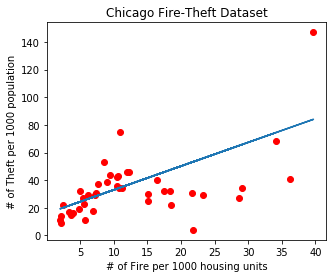

In [0]:
drawPlot(df,W_out, b_out)